<a href="https://colab.research.google.com/github/makxxic/NOTEBOOKS/blob/main/Stage1Task2Question1WK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import necessary libraries

This initial step imports the required Python libraries for numerical operations (`numpy`) and plotting (`matplotlib.pyplot`). These libraries provide the foundational tools for data manipulation and visualization in our linear regression model.

In [32]:
import numpy as np # Import the NumPy library for numerical operations, aliased as 'np'
import matplotlib.pyplot as plt # Import the Matplotlib library for plotting, specifically the pyplot module, aliased as 'plt'

### Step 2: Define input features (X) and target variable (Y)

In this step, we define our dataset. `X` represents the independent variable (features), and `Y` represents the dependent variable (target). These arrays will be used to train our linear regression model.

In [33]:
X = np.array([0., 0.52631579, 1.05263158, 1.57894737, 2.10526316,
              2.63157895, 3.15789474, 3.68421053, 4.21052632, 4.73684211,
              5.26315789, 5.78947368, 6.31578947, 6.84210526, 7.36842105,
              7.89473684, 8.42105263, 8.94736842, 9.47368421, 10.]) # Define the input feature array X
Y = np.array([2.60943416, 1.76213705, 7.18511292, 9.40744522, 5.46635068,
              8.6061673 , 13.30831239, 14.26225166, 16.70323979, 16.87285951,
              22.17984858, 23.81874177, 24.23732455, 28.20185083, 28.72449237,
              27.91299402, 32.21118578, 31.39802427, 36.91479534, 36.90014818]) # Define the target variable array Y

### Step 3: Define helper functions for linear regression

This section defines the core components of our linear regression model: the `predict` function (which calculates the predicted Y values based on current `m` and `c`), the `mse` function (which computes the Mean Squared Error, a measure of model performance), and the `gradient_descent` function (which iteratively updates `m` and `c` to minimize the MSE).

In [34]:
def predict(X, m, c):
    return m * X + c # Calculate predicted Y values using the linear equation Y = mX + c

def mse(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2) # Calculate the Mean Squared Error (MSE) between true and predicted values

def gradient_descent(X, Y, m, c, learning_rate, epochs):
    n = len(X) # Get the number of data points
    costs = [] # Initialize a list to store MSE values at each epoch

    for epoch in range(epochs):
        Y_pred = predict(X, m, c) # Make predictions with current m and c
        cost = mse(Y, Y_pred) # Calculate the MSE for the current epoch
        costs.append(cost) # Add the current cost to the list

        # Compute gradients
        dm = (-2/n) * np.sum(X * (Y - Y_pred)) # Calculate the gradient of the MSE with respect to m
        dc = (-2/n) * np.sum(Y - Y_pred) # Calculate the gradient of the MSE with respect to c

        # Update parameters
        m -= learning_rate * dm # Update m using the learning rate and its gradient
        c -= learning_rate * dc # Update c using the learning rate and its gradient

        print(f"Epoch {epoch+1}: MSE = {cost:.4f}, m = {m:.4f}, c = {c:.4f}") # Print progress for each epoch

    return m, c, costs # Return the final m, c, and the list of costs

### Step 4: Initialize parameters and train the model

This step sets the initial values for the model's parameters (`m` and `c`), defines the `learning_rate` for gradient descent, and specifies the number of `epochs` (iterations) for training. The `gradient_descent` function is then called to train the model, optimizing `m` and `c` to minimize the MSE.

In [35]:
# Initialize parameters
m = 0.0 # Initialize the slope (m) to 0.0
c = 0.0 # Initialize the y-intercept (c) to 0.0
learning_rate = 0.001 # Set the learning rate for gradient descent
epochs = 1000 # Set the number of training epochs (iterations)

# Train the model
m_final, c_final, costs = gradient_descent(X, Y, m, c, learning_rate, epochs) # Call the gradient_descent function to train the model

Epoch 1: MSE = 499.6112, m = 0.2606, c = 0.0389
Epoch 2: MSE = 432.6182, m = 0.5030, c = 0.0751
Epoch 3: MSE = 374.6628, m = 0.7284, c = 0.1087
Epoch 4: MSE = 324.5257, m = 0.9381, c = 0.1401
Epoch 5: MSE = 281.1522, m = 1.1331, c = 0.1693
Epoch 6: MSE = 243.6298, m = 1.3144, c = 0.1965
Epoch 7: MSE = 211.1693, m = 1.4831, c = 0.2218
Epoch 8: MSE = 183.0878, m = 1.6400, c = 0.2454
Epoch 9: MSE = 158.7945, m = 1.7860, c = 0.2674
Epoch 10: MSE = 137.7784, m = 1.9217, c = 0.2879
Epoch 11: MSE = 119.5974, m = 2.0479, c = 0.3070
Epoch 12: MSE = 103.8690, m = 2.1653, c = 0.3247
Epoch 13: MSE = 90.2625, m = 2.2745, c = 0.3413
Epoch 14: MSE = 78.4914, m = 2.3761, c = 0.3567
Epoch 15: MSE = 68.3083, m = 2.4705, c = 0.3711
Epoch 16: MSE = 59.4988, m = 2.5584, c = 0.3846
Epoch 17: MSE = 51.8778, m = 2.6401, c = 0.3971
Epoch 18: MSE = 45.2848, m = 2.7160, c = 0.4088
Epoch 19: MSE = 39.5812, m = 2.7867, c = 0.4196
Epoch 20: MSE = 34.6470, m = 2.8524, c = 0.4298
Epoch 21: MSE = 30.3784, m = 2.9136, 

### Step 5: Visualize the cost function progress

This visualization shows how the Mean Squared Error (MSE) changes over the training epochs. A decreasing curve indicates that the gradient descent algorithm is successfully minimizing the cost function, moving towards better model parameters.

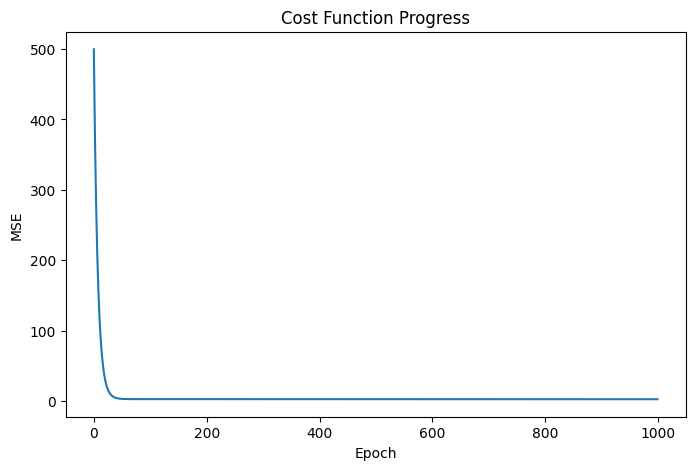

In [36]:
plt.figure(figsize=(8,5)) # Create a new figure with a specified size
plt.plot(range(len(costs)), costs) # Plot the MSE values (costs) against the number of epochs
plt.title("Cost Function Progress") # Set the title of the plot
plt.xlabel("Epoch") # Set the label for the x-axis
plt.ylabel("MSE") # Set the label for the y-axis
plt.show() # Display the plot

### Step 6: Visualize the final linear regression fit and display parameters

This final step visualizes the original data points and the line fitted by our linear regression model after training. It allows us to visually assess how well the model captures the relationship between `X` and `Y`. Additionally, the final optimized values for the slope (`m_final`) and y-intercept (`c_final`) are printed.

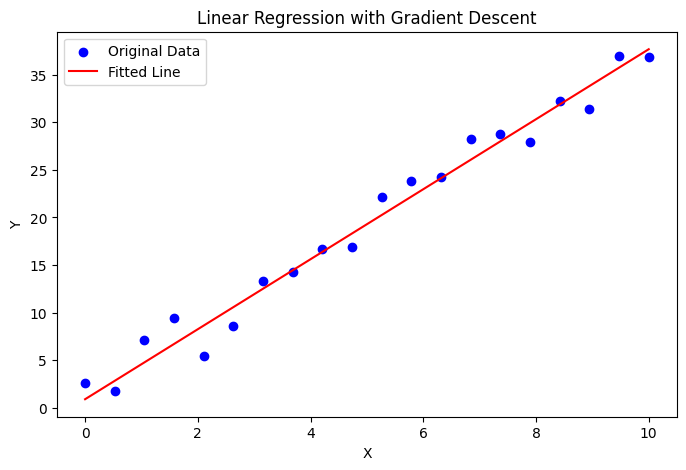

Final parameters:
m = 3.6749
c = 0.9191


In [37]:
plt.figure(figsize=(8,5)) # Create a new figure with a specified size
plt.scatter(X, Y, color='blue', label='Original Data') # Plot the original data points as a scatter plot in blue
plt.plot(X, predict(X, m_final, c_final), color='red', label='Fitted Line') # Plot the fitted linear regression line in red using the final m and c values
plt.title("Linear Regression with Gradient Descent") # Set the title of the plot
plt.xlabel("X") # Set the label for the x-axis
plt.ylabel("Y") # Set the label for the y-axis
plt.legend() # Display the legend to differentiate original data and fitted line
plt.show() # Display the plot

print(f"Final parameters:\nm = {m_final:.4f}\nc = {c_final:.4f}") # Print the final optimized values of m and c, formatted to 4 decimal places